## Feature Extraction, New and Improved

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from pathlib import Path
from sklearn.model_selection import train_test_split
from pydub import AudioSegment

## Using data from Hoofers

In [2]:
samples, sample_rate = librosa.load('../../../Source/Clean_train_clips/Shuffle/1/1.wav')

**Visualize audio files with librosa**

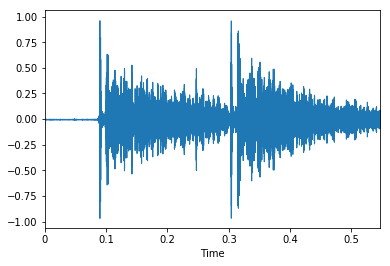

In [3]:
librosa.display.waveplot(samples, sr=sample_rate)

### Feature: 
BPM

Let's try it with a longer sample with a known BPM.

In [4]:
# Estimate a static tempo
y, sr = librosa.load( '../../../workout.wav')
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo.item() #according to song BPM the correct tempo is 174 BPM

117.45383522727273

In [5]:
# Maybe it's not a static tempo

# But rather a dynamic tempo
dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr,
                            aggregate=None)
dtempo

array([ 86.1328125 ,  86.1328125 ,  86.1328125 , ..., 112.34714674,
       112.34714674, 112.34714674])

Now with short, tap sample.

In [6]:
# Estimate a static tempo
#y, sr = librosa.load('../../../Source/Clean_train_clips/Ball_change/6/1.wav')
y, sr = librosa.load('../../../Source/Shuffle/1/1.wav')
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo 

array([258.3984375])

**This could be a promising feature.**

### Other (maybe useful) stuff from librosa

In [7]:
y, sr = librosa.load('../../../Source/Shuffle/1/1.wav', mono=False)
y.shape # Check mono or stereo

(29400,)

In [8]:
librosa.core.get_duration(y =y, sr=sr) # Get duration in seconds

1.3333333333333333

### Feature:
Mel-frequency cepstral coefficients 

In [9]:
n_mfcc = 20   #Remember to change file path at end of nb

In [10]:
# Extract mfcc feature from data
mfccs = np.mean(librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=n_mfcc).T,axis=0) 

In [11]:
len(mfccs)

20

### Repeat for all data (Organize in a DataFrame)

In [12]:
def build_list(step, folder, length):
    i = 1
    step_list = []
    while i <= length :
        name = step + "/" + str(folder) + "/" +str(i) + ".wav"
        step_list.append(name)
        i += 1
    return step_list

def get_label(path):
    if path.parts[-3] == 'Shuffle':
        return 1
    else:
        return 0

In [13]:
shuffle_col, bc_col, path_col = [], [], []

In [14]:
pathlist = Path('../../../Source/Clean_train_clips/Shuffle').glob('**/*.wav')
for path in pathlist:
    shuffle_col.append(path)
    shuffle_col.sort()

In [15]:
pathlist = Path('../../../Source/Clean_train_clips/Ball_change').glob('**/*.wav')
for path in pathlist:
    bc_col.append(path)
    bc_col.sort()

In [16]:
path_col = shuffle_col + bc_col

** Add file paths**

In [17]:
tap = pd.DataFrame({'Path':path_col})
tap

,Path
0,../../../Source/Clean_train_clips/Shuffle/1/1.wav
1,../../../Source/Clean_train_clips/Shuffle/1/10...
2,../../../Source/Clean_train_clips/Shuffle/1/11...
3,../../../Source/Clean_train_clips/Shuffle/1/12...
4,../../../Source/Clean_train_clips/Shuffle/1/13...
5,../../../Source/Clean_train_clips/Shuffle/1/2.wav
6,../../../Source/Clean_train_clips/Shuffle/1/3.wav
7,../../../Source/Clean_train_clips/Shuffle/1/4.wav
8,../../../Source/Clean_train_clips/Shuffle/1/5.wav
9,../../../Source/Clean_train_clips/Shuffle/1/6.wav


** Add labels**

In [18]:
tap['Labels'] = [get_label(tap.loc[idx,'Path']) for idx in range(len(tap))]

**Add Features: MFCCs**

In [19]:
def get_features_mfcc(path):
    samples, sample_rate = librosa.load(path)
    mfccs = np.mean(librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=n_mfcc).T,axis=0)
    return mfccs

In [20]:
for i in range (n_mfcc):
    tap[str(i)] = [get_features_mfcc(tap.loc[idx, 'Path'])[i] for idx in range (len(tap))]

In [21]:
tap.head()

,Path,Labels,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,../../../Source/Clean_train_clips/Shuffle/1/1.wav,1,-152.435155,78.311769,-106.482258,40.668131,-6.848575,-13.537377,-25.102485,6.754208,...,-18.794214,-9.100824,-3.329641,-9.682083,-10.265548,-2.854873,-2.821410,-11.892168,-1.505338,-2.087528
1,../../../Source/Clean_train_clips/Shuffle/1/10...,1,-143.991075,65.523449,-102.436753,32.133732,-7.930019,-3.615873,-29.871724,-0.182348,...,-20.080337,-12.818014,-1.179643,-8.972827,-13.680871,-0.441789,-5.826206,-15.578982,-4.161982,-2.657234
2,../../../Source/Clean_train_clips/Shuffle/1/11...,1,-129.072670,59.774233,-97.656748,35.739948,-4.885226,-0.900206,-23.750029,-4.998659,...,-32.745181,-10.114629,-0.294712,-9.785794,-14.757999,-2.040899,-4.384916,-20.807594,-8.360181,-2.981402
3,../../../Source/Clean_train_clips/Shuffle/1/12...,1,-157.448416,71.945819,-105.594077,33.904608,-1.771036,-8.738653,-30.610143,1.405105,...,-21.339286,-13.857828,-3.612706,-9.410982,-14.136805,-4.416947,-4.629338,-16.549472,-3.571637,-3.324539
4,../../../Source/Clean_train_clips/Shuffle/1/13...,1,-182.069789,83.063060,-97.683985,32.842908,3.010242,5.194879,-24.979170,0.772903,...,-29.549848,-14.960411,-1.455632,-10.201366,-13.376806,-5.384937,-2.593670,-19.554310,-7.848034,-1.967332


** Add Features: Tempo**

In [22]:
def get_features_bpm(path):
    samples, sample_rate = librosa.load(path)
    onset_env = librosa.onset.onset_strength(samples, sr=sample_rate)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sample_rate)
    return tempo.item()

In [23]:
tap['BPM'] = [get_features_bpm(tap.loc[idx, 'Path']) for idx in range (len(tap))]

In [24]:
tap.head()

,Path,Labels,0,1,2,3,4,5,6,7,...,11,12,13,14,15,16,17,18,19,BPM
0,../../../Source/Clean_train_clips/Shuffle/1/1.wav,1,-152.435155,78.311769,-106.482258,40.668131,-6.848575,-13.537377,-25.102485,6.754208,...,-9.100824,-3.329641,-9.682083,-10.265548,-2.854873,-2.821410,-11.892168,-1.505338,-2.087528,258.398438
1,../../../Source/Clean_train_clips/Shuffle/1/10...,1,-143.991075,65.523449,-102.436753,32.133732,-7.930019,-3.615873,-29.871724,-0.182348,...,-12.818014,-1.179643,-8.972827,-13.680871,-0.441789,-5.826206,-15.578982,-4.161982,-2.657234,215.332031
2,../../../Source/Clean_train_clips/Shuffle/1/11...,1,-129.072670,59.774233,-97.656748,35.739948,-4.885226,-0.900206,-23.750029,-4.998659,...,-10.114629,-0.294712,-9.785794,-14.757999,-2.040899,-4.384916,-20.807594,-8.360181,-2.981402,234.907670
3,../../../Source/Clean_train_clips/Shuffle/1/12...,1,-157.448416,71.945819,-105.594077,33.904608,-1.771036,-8.738653,-30.610143,1.405105,...,-13.857828,-3.612706,-9.410982,-14.136805,-4.416947,-4.629338,-16.549472,-3.571637,-3.324539,215.332031
4,../../../Source/Clean_train_clips/Shuffle/1/13...,1,-182.069789,83.063060,-97.683985,32.842908,3.010242,5.194879,-24.979170,0.772903,...,-14.960411,-1.455632,-10.201366,-13.376806,-5.384937,-2.593670,-19.554310,-7.848034,-1.967332,184.570312


** Add features: zero-crossing rate**

In [ ]:
y, sr = librosa.load('../../../Source/Clean_train_clips/Shuffle/1/12.wav')
zero_rate = librosa.feature.zero_crossing_rate(y)
zero_rate.shape[1]

In [ ]:
samples, sample_rate = librosa.load('../../../Source/Clean_train_clips/Shuffle/1/10.wav')
avg_zcr = np.mean(librosa.feature.zero_crossing_rate(y=samples).T,axis=0)
zcrs= librosa.feature.zero_crossing_rate(samples)

print((librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=n_mfcc)).shape)
print(zcrs.shape)
print(np.mean(librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=n_mfcc).T,axis=0).shape)
print(avg_zcr.shape)

In [50]:
def get_features_ZCR(path):
    samples, sample_rate = librosa.load(path)
    return np.mean(librosa.feature.zero_crossing_rate(y=samples).T,axis=0).item()

In [51]:
tap['ZCR'] = [get_features_ZCR(tap.loc[idx, 'Path']) for idx in range (len(tap))]

** Add features: root mean square energy value**

In [58]:
def get_features_rmse(path):
    samples, sample_rate = librosa.load(path)
    return np.mean(librosa.feature.rmse(y=samples).T,axis=0).item()

In [59]:
tap['RMSE'] = [get_features_rmse(tap.loc[idx, 'Path']) for idx in range (len(tap))]

** Add features: short term energy**

In [93]:
def get_features_ste(path):
    hop_length = 125
    frame_length = 250
    samples, sample_rate = librosa.load(path)
    energy = np.array([sum(abs(samples[i:i+frame_length]**2))for i in range(0, len(samples), hop_length)])
    return np.mean(energy.T)

In [94]:
tap['STE'] = [get_features_ste(tap.loc[idx, 'Path']) for idx in range (len(tap))]

### Pimped out DataFrame

In [95]:
tap.head()

,Path,Labels,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,BPM,ZCR,RMSE,STE
0,../../../Source/Clean_train_clips/Shuffle/1/1.wav,1,-152.435155,78.311769,-106.482258,40.668131,-6.848575,-13.537377,-25.102485,6.754208,...,-10.265548,-2.854873,-2.821410,-11.892168,-1.505338,-2.087528,258.398438,0.183553,0.113765,3.927907
1,../../../Source/Clean_train_clips/Shuffle/1/10...,1,-143.991075,65.523449,-102.436753,32.133732,-7.930019,-3.615873,-29.871724,-0.182348,...,-13.680871,-0.441789,-5.826206,-15.578982,-4.161982,-2.657234,215.332031,0.187988,0.105637,3.369918
2,../../../Source/Clean_train_clips/Shuffle/1/11...,1,-129.072670,59.774233,-97.656748,35.739948,-4.885226,-0.900206,-23.750029,-4.998659,...,-14.757999,-2.040899,-4.384916,-20.807594,-8.360181,-2.981402,234.907670,0.201621,0.082684,1.902416
3,../../../Source/Clean_train_clips/Shuffle/1/12...,1,-157.448416,71.945819,-105.594077,33.904608,-1.771036,-8.738653,-30.610143,1.405105,...,-14.136805,-4.416947,-4.629338,-16.549472,-3.571637,-3.324539,215.332031,0.185764,0.094802,2.716855
4,../../../Source/Clean_train_clips/Shuffle/1/13...,1,-182.069789,83.063060,-97.683985,32.842908,3.010242,5.194879,-24.979170,0.772903,...,-13.376806,-5.384937,-2.593670,-19.554310,-7.848034,-1.967332,184.570312,0.180020,0.068570,1.398406


### Split into train and test sets

In [96]:
X = tap.drop(['Labels'], axis =1)
y = tap[['Labels']]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [98]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [99]:
X_train.to_csv('../../../Source/Data/X_train_mfccplus.csv', index=None)
y_train.to_csv('../../../Source/Data/y_train_mfccplus.csv', index=None)
X_test.to_csv('../../../Source/Data/X_test_mfccplus.csv', index=None)
y_test.to_csv('../../../Source/Data/y_test_mfccplus.csv', index=None)


In [30]:
#tap.to_csv('../../../Source/Data/tap_n20.csv', index=None)